<div style="max-width:66ch;">

# Lecture notes - Stockdata API and time series

This is a lecture note on stock data from API - but it's built upon contents from pandas and previous course:

- Python programming

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to merging. I encourage you to read further about API.

Read more

- [video - API-key .env](https://www.youtube.com/watch?v=YdgIWTYQ69A)
- [wikipedia - REST API theory](https://en.wikipedia.org/wiki/Representational_state_transfer)
- [video - Python - requests](https://www.youtube.com/watch?v=tb8gHvYlCFs)
- [w3schools - requests](https://www.w3schools.com/python/module_requests.asp)

</div>


<div style="max-width:66ch;">

## API


An API, or Application Programming Interface, is a set of rules and protocols that allows different software applications to communicate with each other. It defines the methods and data formats that applications can use to request and exchange information. APIs enable the integration of different software systems, allowing them to work together seamlessly. Specifically we'll be using a web API, which will give us possibility to query data from a web server. 


</div>

<div style="max-width:66ch;">

## Stocks API

Go into [Alpha Vantage](https://www.alphavantage.co/documentation/) and read the documentation of the time series APIs

- Go into [claim API key](https://www.alphavantage.co/support/#api-key) and fill in the form to claim your free API-key

- You will be using the API key to access stock data

- Create a file called .env and type:

```py
ALPHA_API_KEY = ...
```

- the dots should be your API key
- go into your .gitignore file in your repo and make sure that there is .env there so that you don't push the .env file to a public Github repo where anyone can access your key and do stuffs in your name

**Setup**

- pipenv install python-dotenv

[Symbols of stocks](https://www.nasdaq.com/market-activity/stocks/screener) that is useful for get-request


</div>

In [22]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
# NOTE: you can print it for your own validation, but remove the print before pushing to Github

symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

for symbol in symbols:
    function = "TIME_SERIES_DAILY"

    url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}'
    #url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}'
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (Daily)"]).transpose()
    df = df["4. close"].rename(symbol).astype(float)
    stock_list.append(df)


In [24]:
# concatenate the list of series to a df
stocks = pd.concat(stock_list, axis=1)
stocks


,AAPL,NVDA,TSLA,IBM
2023-12-01,191.24,467.65,238.83,160.55
2023-11-30,189.95,467.70,240.08,158.56
2023-11-29,189.37,481.40,244.14,156.41
2023-11-28,190.40,478.21,246.72,155.65
2023-11-27,189.79,482.42,236.08,155.57
...,...,...,...,...
2023-07-19,195.10,470.77,291.26,135.48
2023-07-18,193.73,474.94,293.34,135.36
2023-07-17,193.99,464.61,290.38,134.24
2023-07-14,190.69,454.69,281.38,133.40


In [25]:
import plotly_express as px

# initial plot
px.line(stocks, x=stocks.index, y=[
        "AAPL", "NVDA", "TSLA", "IBM"],
        labels={"variable": "Stock", "index": "Year", "value": "Value $"},
        title="Some stocks", log_y=True)


<div style="max-width:66ch;">

## Working with time series

A time series is a series of data points or observations recorded or measured in sequential order over time. Each data point is associated with a specific time, making time series data distinct from other types of data. Time series analysis involves studying the patterns, trends, and behaviors in the data over time.

</div>

In [26]:
print(stocks.index.dtype)
# type cast index from object to datetime
stocks.index = pd.to_datetime(stocks.index)
print(stocks.index.dtype)
stocks.head()


object
datetime64[ns]


,AAPL,NVDA,TSLA,IBM
2023-12-01,191.24,467.65,238.83,160.55
2023-11-30,189.95,467.70,240.08,158.56
2023-11-29,189.37,481.40,244.14,156.41
2023-11-28,190.40,478.21,246.72,155.65
2023-11-27,189.79,482.42,236.08,155.57


In [28]:
stocks.loc["2023-12-01"]  # gives all data where year is 2020


AAPL    191.24
NVDA    467.65
TSLA    238.83
IBM     160.55
Name: 2023-12-01 00:00:00, dtype: float64

In [32]:
# gives all rows between these dates
stocks.sort_index().loc["2023-11-15":"2023-12"]  

,AAPL,NVDA,TSLA,IBM
2023-11-15,188.01,488.88,242.84,152.58
2023-11-16,189.71,494.80,233.59,153.06
2023-11-17,189.69,492.98,234.30,152.89
2023-11-20,191.45,504.09,235.60,154.35
2023-11-21,190.64,499.44,241.20,153.91
2023-11-22,191.31,487.16,234.21,155.13
2023-11-24,189.97,477.76,235.45,155.18
2023-11-27,189.79,482.42,236.08,155.57
2023-11-28,190.40,478.21,246.72,155.65
2023-11-29,189.37,481.40,244.14,156.41


<div style="max-width:66ch;">

## Plot 4 stocks in subplots

</div>

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)
array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)


Text(0.5, 1.03, 'Stocks during 2023 mid-july until beginning of december')

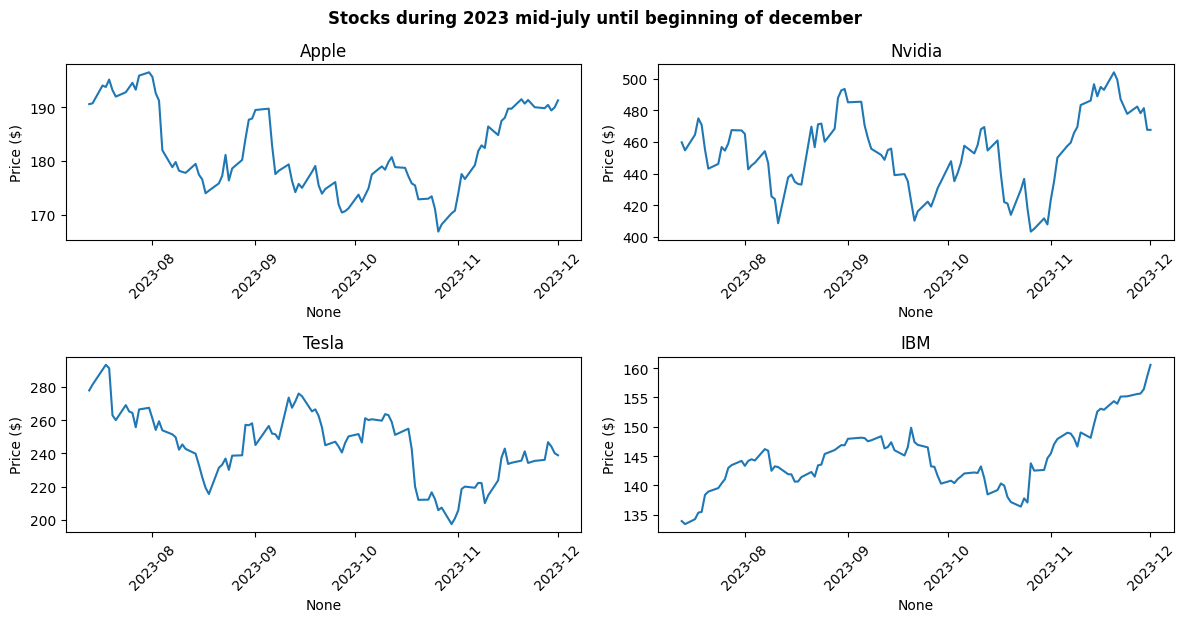

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, dpi=100, figsize=(12, 6))

# 2D array -> 2D array has a method flatten() to create a numpy flattened array
print(repr(axes))
print(repr(axes.flatten()))

stock_names = {"AAPL": "Apple", "NVDA": "Nvidia", "TSLA": "Tesla", "IBM": "IBM"}

stocks_2023 = stocks.loc["2023"]

for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data=stocks_2023, x=stocks_2023.index, y=symbol, ax=ax)
    ax.tick_params(axis="x", rotation=45)
    ax.set(title=f"{stock_names[symbol]}", ylabel="Price ($)")
    # ax.grid()

fig.tight_layout()
fig.suptitle(
    "Stocks during 2023 mid-july until beginning of december", y=1.03, fontweight="bold"
)

<div style="max-width:66ch;">

## Summary

In this lecture we've worked with a web API and time series data. Also we've gone through environment file .env to store your secrets, in this case an API-key. Note that it's important to check that your .gitignore involves .env so that it doesn't accidentally get into a repository so that others can use your secrets.

</div>

<div style="background-color: #FFF; color: #212121; border-radius: 1px; width:22ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1.5em 0; width: 70%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
<div>
</div>
